In [2]:
# First we load all the necessary libraries that we will use in our model. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold


Since the boston housingdata is no longer available in sklearn, we will use California housing dataset after downloading from Kaggle using pandas. Thereafter, I will perform exploratory data analysis and preprocessing. Exploratory data analysis enables us to identify the general pattern of the data in the California housing dataset. So, we will be identifying any outliers and other unexpected features. 

In [4]:
data = "C:/Users/Admin/Downloads/housing.csv.zip"
df=pd.read_csv(data)
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

The California housing dataset has 506 rows and 14 columns. We are now going to do an exploratory analysis for it. That includes statistics, data type, shape, and general information of the data

In [5]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000


1.Most houses are aged between 18-37 years.

2. The maximum median age of houses is 52 years and the least is 1 year
3. Most building blocks has rooms between 1448-3148 room.
4. Most building blocks has bed rooms between 336-977 room.
5. Most building blocks has population between 787-1725 people.
6. Most building blocks has households between 313-538 people.
7. Most people has income between 2138.050- 4583.300 pounds.
8. Most houses cost between 119600-264725 pounds with the least costing 14,999 and most expensive costing 500001.

In [16]:
df.describe(include="object")

ocean_proximity
count            20640
unique               5
top          <1H OCEAN
freq              9136

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
#data cleaning
df.isnull().values.any()


True

In [19]:
df.isnull().sum().sum()

207

The dataset has a total of 207 missing values in data

In [20]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [21]:
data= df.fillna(0)

After checking for missing values, we find out that our data has a lot of missing values in total_bedrooms

In [22]:
data.sample(n=100)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17685    -121.83     37.30                16.0       5684.0          1386.0   
14206    -117.06     32.69                 9.0        521.0           111.0   
11590    -118.01     33.78                26.0       2343.0           377.0   
7011     -118.07     33.97                32.0       3400.0           826.0   
18342    -122.14     37.43                52.0       1383.0           227.0   
...          ...       ...                 ...          ...             ...   
7871     -118.14     33.89                37.0       1159.0           238.0   
5277     -118.51     34.04                38.0       4715.0           691.0   
12674    -121.38     38.49                11.0       8537.0          1643.0   
10018    -121.20     39.23                 9.0       2802.0           447.0   
1755     -122.32     37.94                46.0       1901.0           295.0   

       population  households  median_income  median_house_value  \
17685      4203.0      1318.0         3.1964            185800.0   
14206       491.0       110.0         5.1305            158900.0   
11590      1166.0       373.0         6.0000            233100.0   
7011       3017.0       793.0         2.4607            155600.0   
18342       551.0       249.0         6.5829            500001.0   
...           ...         ...            ...                 ...   
7871        740.0       243.0         4.9107            179600.0   
5277       1660.0       637.0        10.1882            500001.0   
12674      4224.0      1648.0         2.9647            108900.0   
10018       955.0       418.0         5.2359            213300.0   
1755        833.0       352.0         5.5196            210800.0   

      ocean_proximity  
17685       <1H OCEAN  
14206      NEAR OCEAN  
11590       <1H OCEAN  
7011        <1H OCEAN  
18342        NEAR BAY  
...               ...  
7871        <1H OCEAN  
5277        <1H OCEAN  
12674          INLAND  
10018          INLAND  
1755         NEAR BAY  

[100 rows x 10 columns]

In [23]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

So, we have used mean to fill in the missing values in our dataset. The next thing is to visualize this data using histogram, scatterplots, correlation matrix heatmap, then we can start training our dataset

In [77]:
X=data.drop([ 'median_house_value'],  axis=1)
y=data['median_house_value']

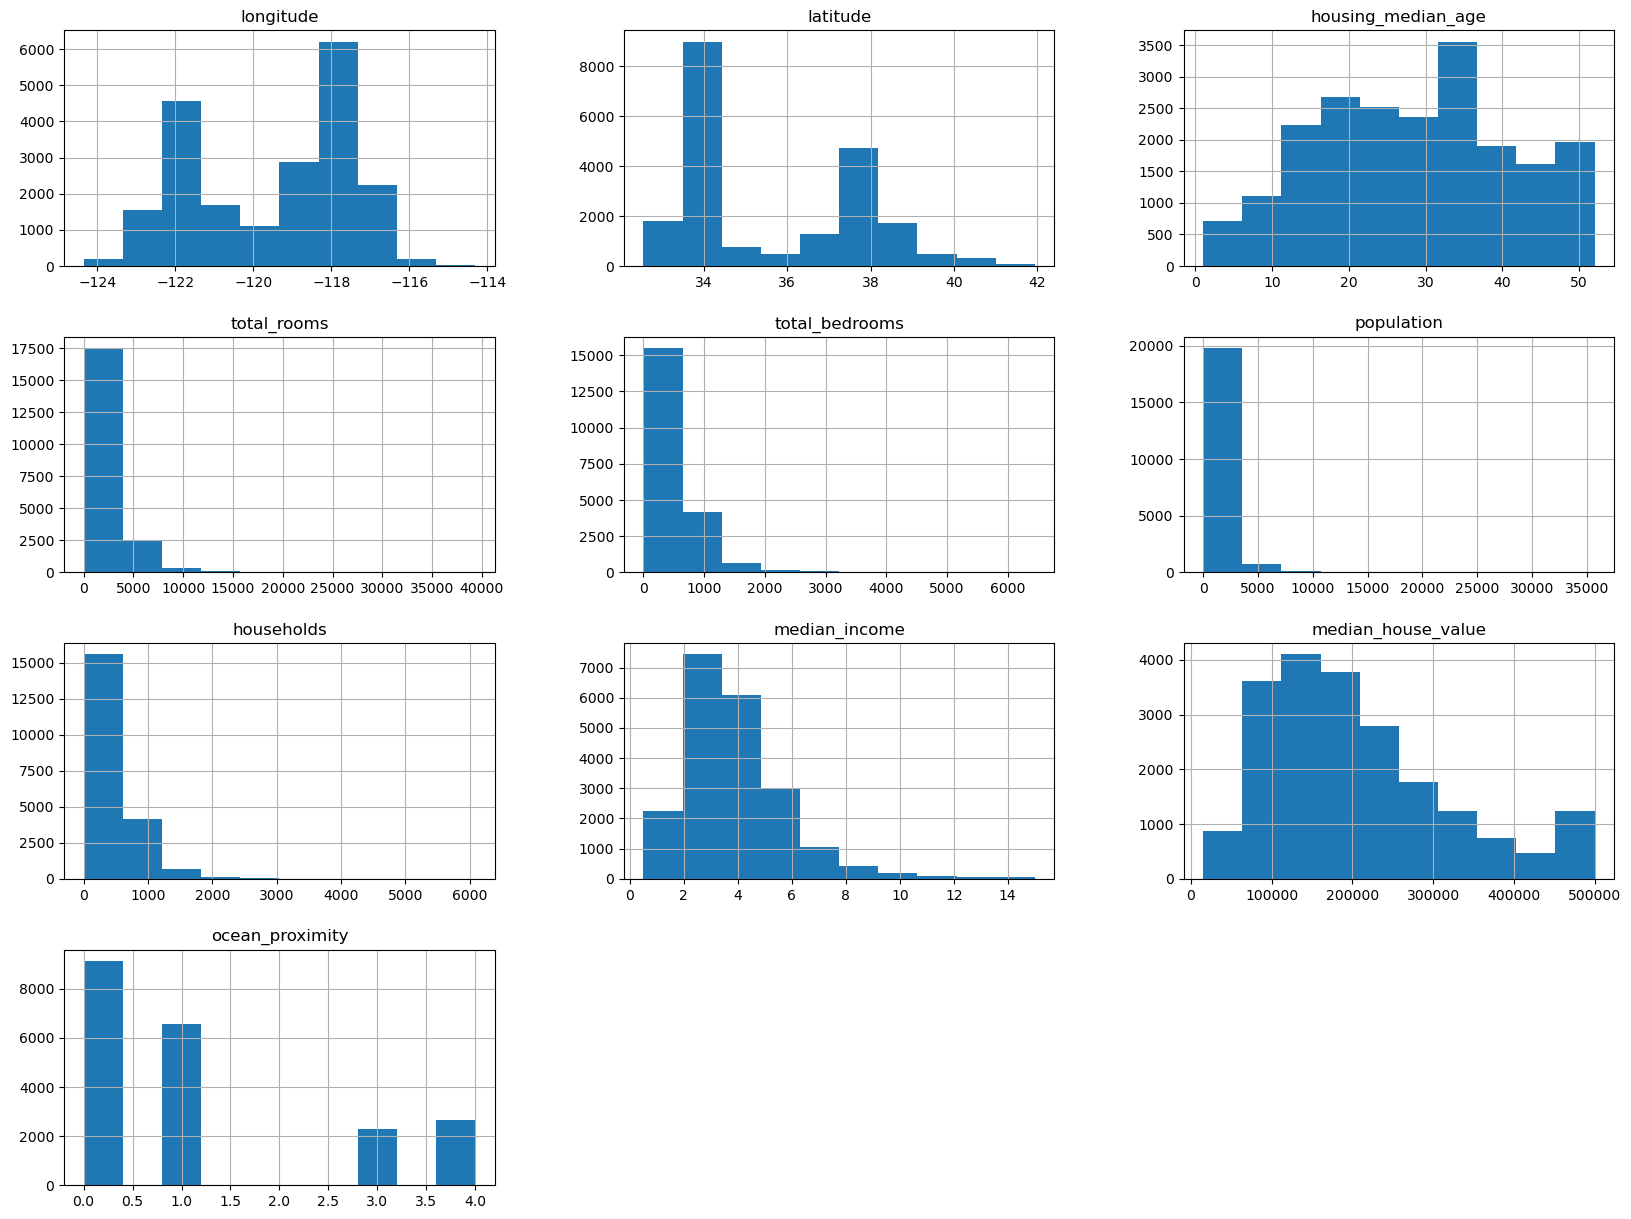

In [78]:
#histogram
data.hist(figsize=(20, 15))
plt.show()

Insights;

1. 
'housing_median_age' : most of houses is between 10 to 45 years old .. and there are big number of houses above 50 year 2. .
'total_rooms'and 'total_bedrooms' are almost have the same curve3. ..
total_rooms' has range between 0 and 10000 rooms in block with mean= 2500 aproximat4. ly.
'total_bedrooms'has range between 0 and 1000 rooms in block with mean= 540 aproxima5. tly.
'population', 'households' also have the same curve and the same range as in 'total_rooms'and 'total_bedro6. oms'.
'median_income' most of people earn beeen 2.5k and 5k. few people has more than 10K up to 15k , then there are a small increase of income 4bov7. e 15k.
'median_house_value' : its curve looks some how like 'median_income' curve so there are relation between them .

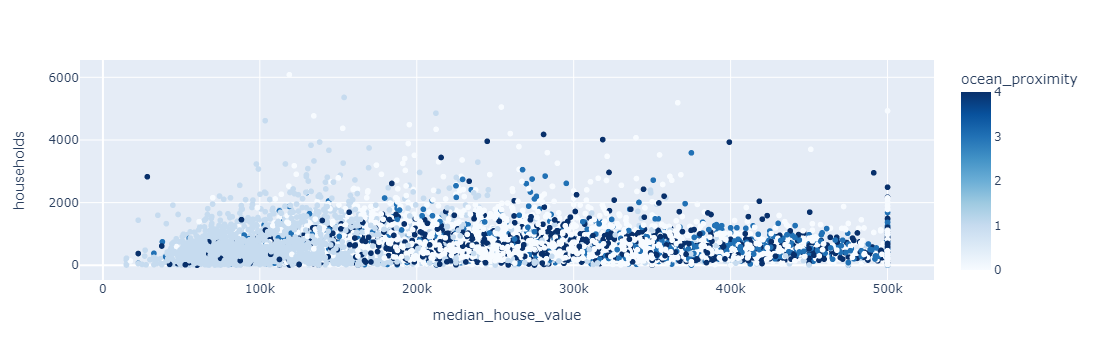

In [46]:
fig = px.scatter(data, x="median_house_value", y="households", color=data['ocean_proximity'],  color_continuous_scale='Blues')
fig.update_layout(legend_title_text='ocean_proximity')

Insights
1. Many households are living near ocean with median house value between 100k and 300k
2. 5358 households are living INLAND with median_house value of 153.7K
3. 6082 households with median house value of 118.8k are living <1H ocean proximity
4. 4930 households ilve in median house value 500.001k at <1H OCEAN proximity
5. 4176 households with median house value of 280.8k live NEAR OCEAN
6. Many households living INLAND prefer houses with median house value of up to 200k

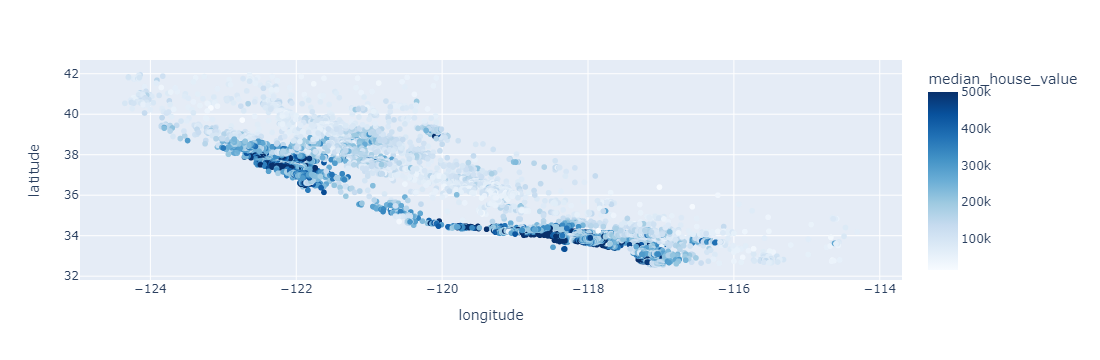

In [28]:
fig = px.scatter(data, x="longitude", y="latitude", color=data['median_house_value'],  color_continuous_scale='Blues')
fig.update_layout(legend_title_text='median_house_value')

Houses near ocean are more expensive than the others 

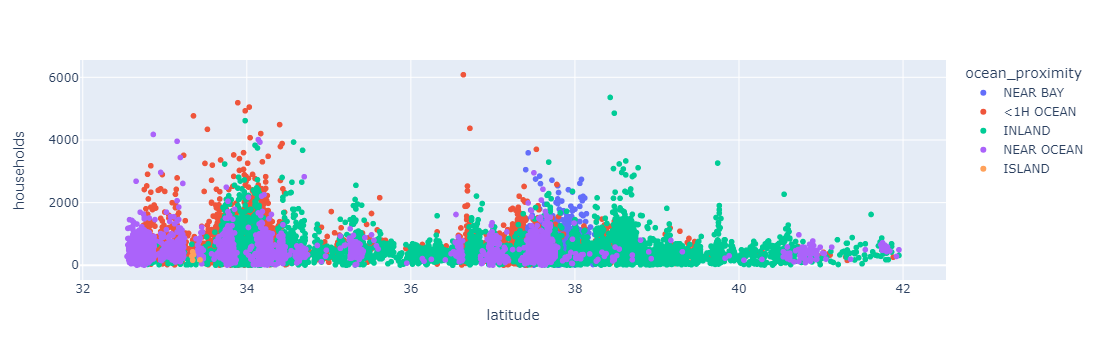

In [29]:
fig = px.scatter(data, x="latitude", y="households", color=data['ocean_proximity'],  color_continuous_scale='Blues')
fig.update_layout(legend_title_text='ocean_proximity')

1. Many households in ocean_proximity reside within latitude of 32 and 40
2. The highest number of  households  is 6082 residing in a latitude of 36.64 <1H OCEAN proximity
3. 5358 households reside at a latitude of 38.43 INLAND
4. 1622 households reside at a latitude of 41.61 INLAND
5. Most households with ocean proximity ISLAND reside below latitude of 34

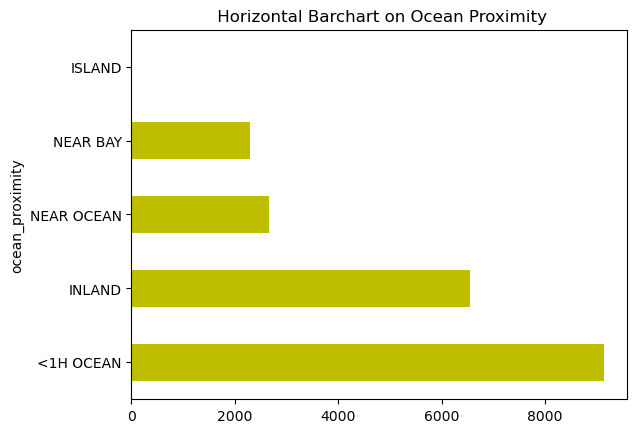

In [32]:
data["ocean_proximity"].value_counts().plot(kind="barh",color='y')
plt.title(' Horizontal Barchart on Ocean Proximity')
plt.show()

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

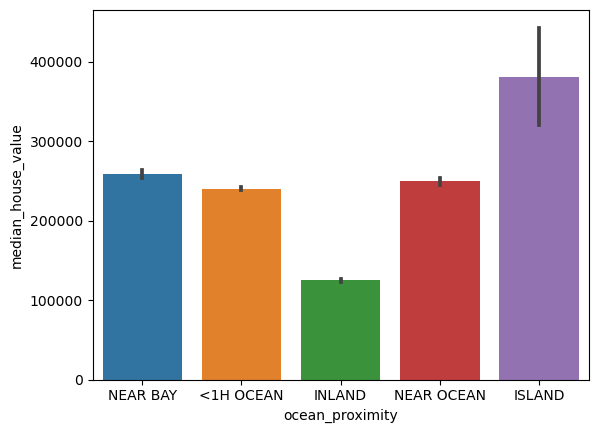

In [33]:
sns.barplot(x="ocean_proximity",y="median_house_value",data=data)

Island houses are the most expensive while INLAND houses are the least expensive

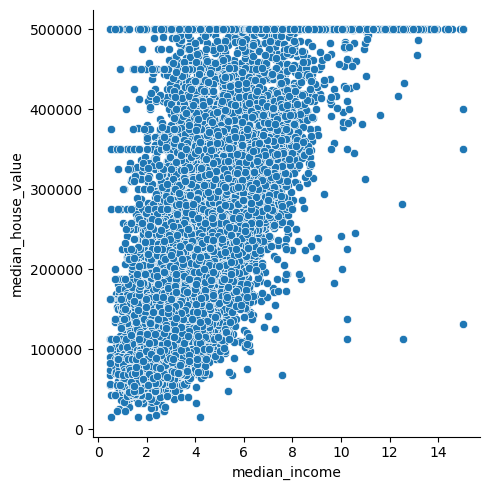

In [34]:
sns.relplot(x="median_income", y="median_house_value", data=data)

Customers with high median_income tend to purchase more expensive houses

In [37]:
#convert household to numeric

data["households"]=data["households"].astype('float64')

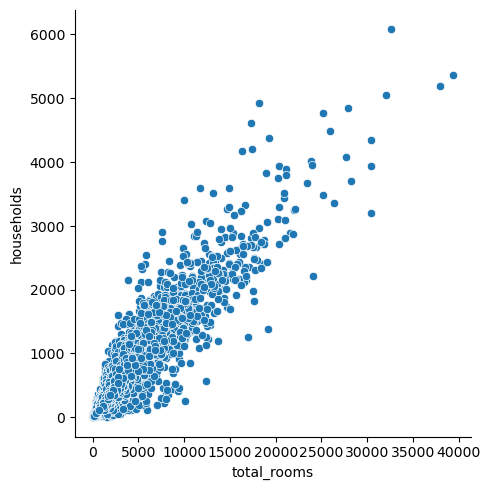

In [38]:
sns.relplot(x="total_rooms", y="households", data=data)

The number total_rooms increases as household increases

In [39]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [221]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
#label encodig of ocean_proximity features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data["ocean_proximity"]=le.fit_transform(data["ocean_proximity"])
data["ocean_proximity"].value_counts()

ocean_proximity
0    9136
1    6551
4    2658
3    2290
2       5
Name: count, dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB


In [67]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

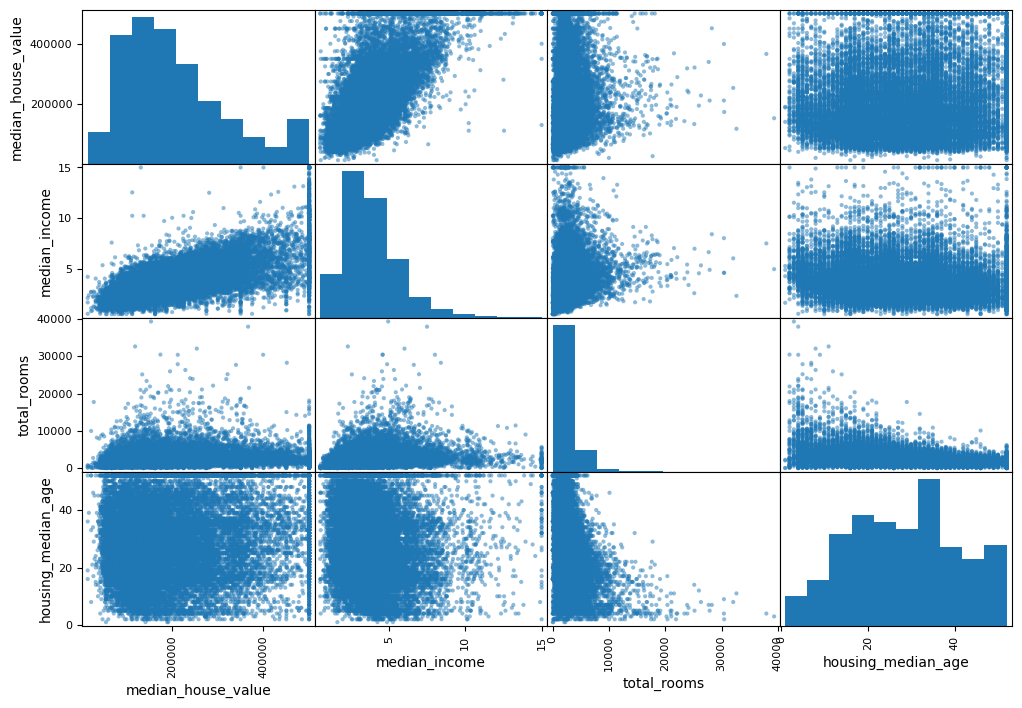

In [74]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(data[attributes],figsize=(12,8))

In [51]:
#Data Preprocessing

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25 , random_state=42)

In [50]:
scale = StandardScaler ()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [103]:
#Linear Regression

reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)
LinearRegression()
reg.score(X_train,y_train)


0.6374932001456142

In [104]:
reg.intercept_

-3608329.6201602262

In [106]:
reg.coef_

array([-4.29448922e+04, -4.26166534e+04,  1.17396228e+03, -8.10132200e+00,
        1.20156480e+02, -3.83393481e+01,  4.13470192e+01,  4.03424268e+04,
       -3.25756566e+02])

In [107]:
#predicting using linear regression
df=pd.DataFrame(reg.coef_,X.columns[:],columns=["Coeficient"])
df

Coeficient
longitude          -42944.892213
latitude           -42616.653353
housing_median_age   1173.962284
total_rooms            -8.101322
total_bedrooms        120.156480
population            -38.339348
households             41.347019
median_income       40342.426775
ocean_proximity      -325.756566

In [110]:
y_predict=reg.predict(X_test)

In [115]:
#R2 Score

reg_score = r2_score(y_test , y_predict)
print('R squared of linear regression :',reg_score)

R squared of linear regression : 0.6144482503448048


In [117]:
#Ridge regression

reg=linear_model.Ridge(alpha=0.9)
reg.fit(X_train,y_train)

Ridge(alpha=0.9)

In [119]:
reg.score(X_train,y_train)

0.637493196683262

In [120]:
reg.score(X_test,y_test)

0.6144531933222674

In [121]:
reg.intercept_

-3607469.443243195

In [122]:
reg.coef_

array([-4.29348980e+04, -4.26075061e+04,  1.17410495e+03, -8.10237621e+00,
        1.20143111e+02, -3.83393071e+01,  4.13690094e+01,  4.03430329e+04,
       -3.24546768e+02])

In [123]:
d=pd.DataFrame(reg.coef_,X.columns[:],columns=["Coeficient"])
d

Coeficient
longitude          -42934.897967
latitude           -42607.506115
housing_median_age   1174.104953
total_rooms            -8.102376
total_bedrooms        120.143111
population            -38.339307
households             41.369009
median_income       40343.032860
ocean_proximity      -324.546768

Business Insight
1. House prices near the ocean is higher
2. An increase in median income increases median housing value